In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import umap
from sklearn.manifold import TSNE

In [2]:
a = np.load("speech_vectors.npy")
meta = pd.read_json("data_processed.txt")

prez_to_party = {
    'George Washington': 'Federalist',
    'John Adams': 'Federalist',
    'Thomas Jefferson': 'Democratic-Republican',
    'James Madison': 'Democratic-Republican',
    'James Monroe': 'Democratic-Republican',
    'James Monroe': 'Democratic-Republican',
    'John Quincy Adams': 'Democratic-Republican',
    'Andrew Jackson': 'Democrat',
    'Martin van Buren': 'Democrat',
    'John Tyler': 'Whig',
    'James Polk': 'Democrat',
    'Zachary Taylor': 'Whig',
    'Millard Fillmore': 'Whig',
    'Franklin Pierce': 'Democrat',
    'James Buchanan': 'Democrat',
    'Abraham Lincoln': 'Republican',
    'Andrew Johnson': 'National Union',
    'Ulysses S. Grant': 'Republican',
    'Rutherford B. Hayes': 'Republican',
    'Chester A. Arthur': 'Republican',
    'Grover Cleveland': 'Democrat',
    'Benjamin Harrison': 'Republican',
    'William McKinley': 'Republican',
    'Theodore Roosevelt': 'Republican',
    'William H. Taft': 'Republican',
    'Woodrow Wilson': 'Democrat',
    'Warren Harding': 'Republican',
    'Calvin Coolidge': 'Republican',
    'Herbert Hoover': 'Republican',
    'Franklin D. Roosevelt': 'Democrat',
    'Harry S. Truman': 'Democrat',
    'Dwight D. Eisenhower': 'Republican',
    'John F. Kennedy': 'Democrat',
    'Lyndon B. Johnson': 'Democrat',
    'Richard Nixon': 'Republican',
    'Gerald R. Ford': 'Republican',
    'Jimmy Carter': 'Democrat',
    'Ronald Reagan': 'Republican',
    'George H.W. Bush': 'Republican',
    'William J. Clinton': 'Democrat',
    'George W. Bush': 'Republican',
}
meta['party'] = meta.who.apply(lambda x: prez_to_party[x])
meta['year'] = meta.date.dt.year
meta['year-of-prez'] = (meta.date.dt.year - 1) % 4

In [3]:
um = pd.DataFrame(data=umap.UMAP().fit_transform(a), index=meta.index, columns=['umap 1', 'umap 2'])
ts = pd.DataFrame(data=TSNE().fit_transform(a), index=meta.index, columns=['tsne 1', 'tsne 2'])

In [4]:
origdata = pd.DataFrame(data=a, index=meta.index, columns=[f'{ix}' for ix in range(a.shape[1])])
alldata = pd.concat([origdata, um, ts, meta], axis=1)

meta

<Axes: xlabel='umap 1', ylabel='umap 2'>

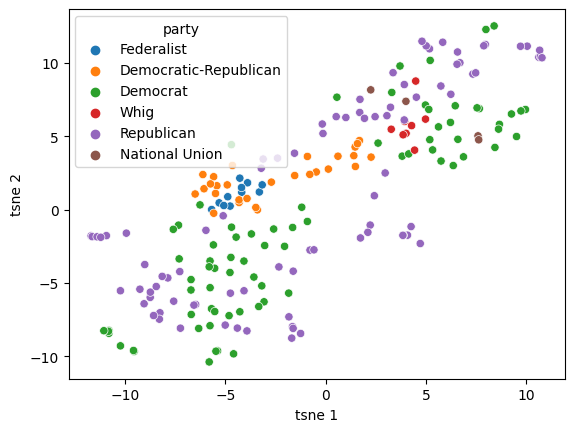

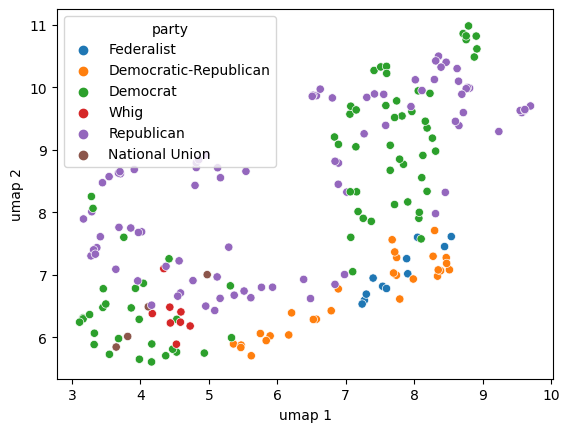

In [5]:
plt.figure()
sns.scatterplot(data=alldata, x='tsne 1', y='tsne 2', hue='party')
plt.figure()
sns.scatterplot(data=alldata, x='umap 1', y='umap 2', hue='party')

<Axes: xlabel='umap 1', ylabel='umap 2'>

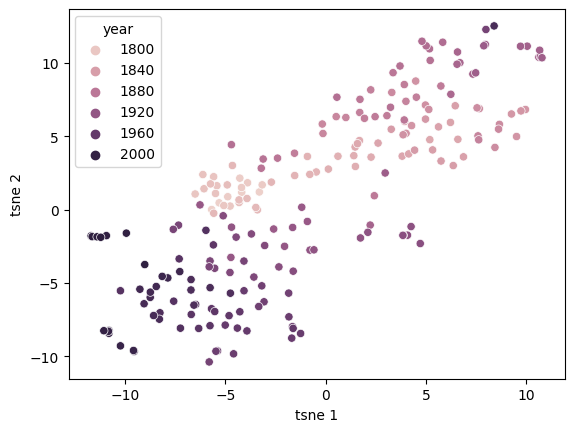

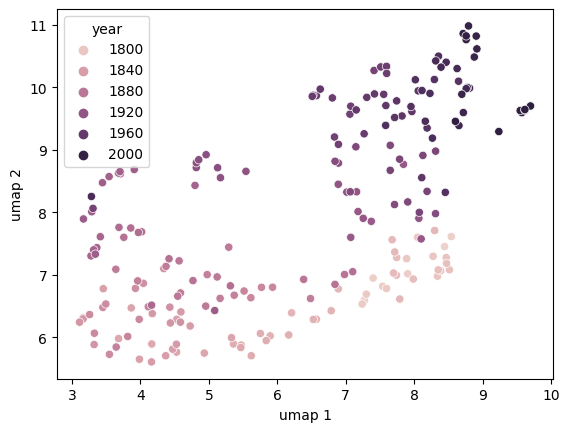

In [6]:
plt.figure()
sns.scatterplot(data=alldata, x='tsne 1', y='tsne 2', hue='year')
plt.figure()
sns.scatterplot(data=alldata, x='umap 1', y='umap 2', hue='year')

<Axes: xlabel='umap 1', ylabel='umap 2'>

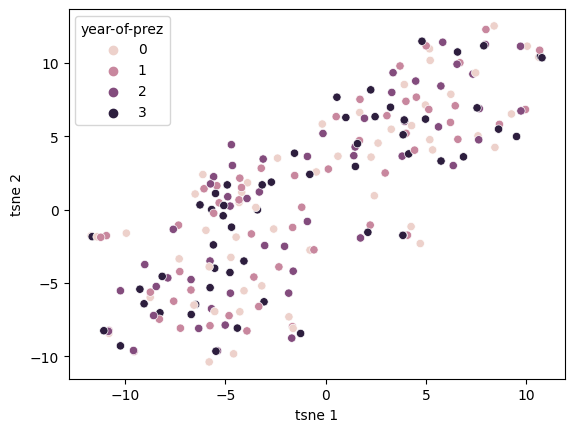

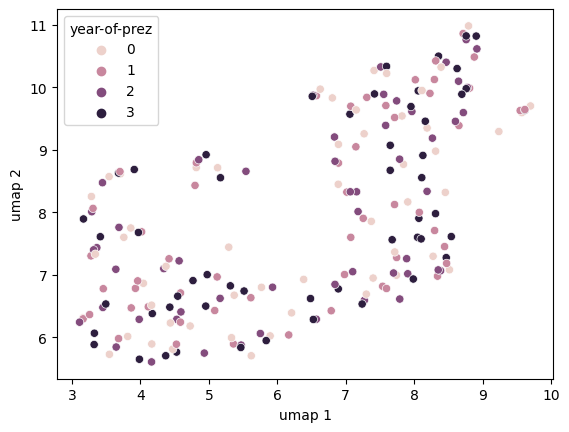

In [7]:
plt.figure()
sns.scatterplot(data=alldata, x='tsne 1', y='tsne 2', hue='year-of-prez')
plt.figure()
sns.scatterplot(data=alldata, x='umap 1', y='umap 2', hue='year-of-prez')